# import data

In [24]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # charts/plots
%matplotlib inline
import re
import seaborn as sns


# books on my Goodreads shelves
books = pd.read_csv('../input/goodreads-data-778-books/goodreads_library_export.csv')
# Goodreads book database with genres
genres = pd.read_json('../input/books-with-genres/goodreads_book_genres_initial.json', lines = True)
pd.set_option('display.max_columns', None)


In [25]:
books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,16793,Stardust,Neil Gaiman,"Gaiman, Neil",NaN,0061142026,9.780061e+12,0,4.08,Harper Perennial,Paperback,248.0,2006.0,1998.0,NaN,5/26/2021,to-read,to-read (#189),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,6294,"Howl’s Moving Castle (Howl’s Moving Castle, #1)",Diana Wynne Jones,"Jones, Diana Wynne",NaN,006441034X,9.780064e+12,0,4.25,Harper Trophy,Mass Market Paperback,329.0,2001.0,1986.0,NaN,5/26/2021,to-read,to-read (#188),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,49392855,The Two Towers,J.R.R. Tolkien,"Tolkien, J.R.R.",Alan Lee,0008376131,9.780008e+12,0,4.45,HarperCollins,Hardcover,385.0,2020.0,1954.0,NaN,10/8/2020,"owned, currently-reading","owned (#36), currently-reading (#3)",currently-reading,NaN,NaN,NaN,2,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
3,6568440,Notes from Underground,Fyodor Dostoyevsky,"Dostoyevsky, Fyodor",NaN,NaN,NaN,4,4.15,NaN,Kindle Edition,NaN,NaN,1864.0,5/26/2021,2/18/2021,"owned, reread","owned (#189), reread (#37)",read,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
4,54419239,Meet Me in Paradise,Libby Hubscher,"Hubscher, Libby",NaN,0593199421,9.780593e+12,0,4.04,Berkley Books,Paperback,352.0,2021.0,2021.0,NaN,5/15/2021,"owned, currently-reading","owned (#119), currently-reading (#2)",currently-reading,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN


In [26]:
genres.head()

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


# clean genre data

In [27]:
def convert_genres_to_list(genres):
    genres_as_list = []
    for genre_array in genres:
        list_of_chars = ''
        list_of_chars = [c for c in genre_array if c not in "'{}:1234567890"]
        removed_filler_characters = ''
        for c in list_of_chars:
            removed_filler_characters += c
        genres_as_list.append(removed_filler_characters)
    return genres_as_list

genres.genres = genres.genres.apply(convert_genres_to_list)
genres.head()

,book_id,genres
0,5333265,"[history, historical fiction, biography]"
1,1333909,"[fiction, history, historical fiction, biography]"
2,7327624,"[fantasy, paranormal, fiction, mystery, thrill..."
3,6066819,"[fiction, romance, mystery, thriller, crime]"
4,287140,[non-fiction]


# what genres do I read?

In [28]:
books_with_genres = pd.merge(books, genres, left_on = 'Book Id', right_on = 'book_id')
separated_genres = pd.DataFrame(columns = ['book_id', 'genre'])

for index, row in books_with_genres.iterrows():
    for genre in row.genres:
        if row['Read Count'] > 0:
            new_row = { 'book_id' : row.book_id, 'genre' : genre }
            separated_genres = separated_genres.append(new_row, ignore_index = True)

separated_genres

,book_id,genre
0,6568440,fiction
1,6568440,"history, historical fiction, biography"
2,28372019,romance
3,28372019,fiction
4,894459,fiction
...,...,...
1738,15751404,fiction
1739,6452796,non-fiction
1740,2612,non-fiction
1741,2612,"history, historical fiction, biography"


In [29]:
separated_genres = separated_genres.groupby(['genre'], as_index = False).count().sort_values('book_id', ascending = False)
my_genres = separated_genres[(separated_genres['genre'] != 'fiction') & (separated_genres['genre'] != 'young-adult') & (separated_genres['genre'] != 'children')]

<AxesSubplot:ylabel='book_id'>

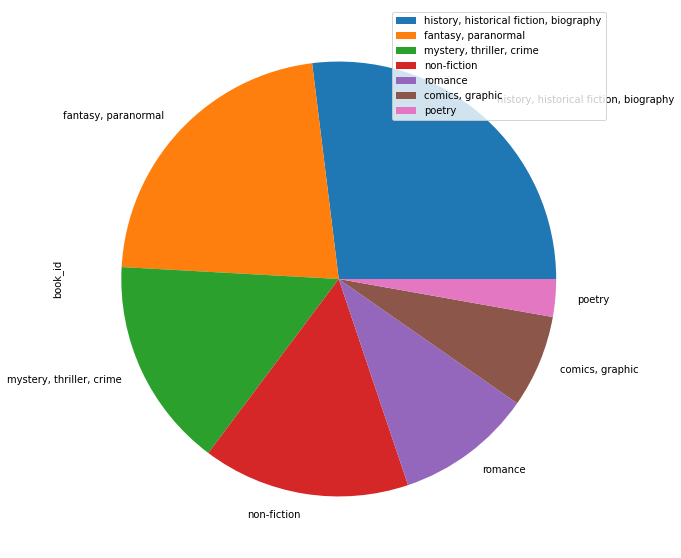

In [30]:
my_genres.plot.pie(y = 'book_id', figsize = (10, 10), labels = my_genres.genre)

# what are the best books I've read?

I removed Calvin and Hobbes books from this list because they pretty much dominate the entire top 10 list.

<AxesSubplot:title={'center':"best books I've read"}, xlabel='Title', ylabel='Average Rating'>

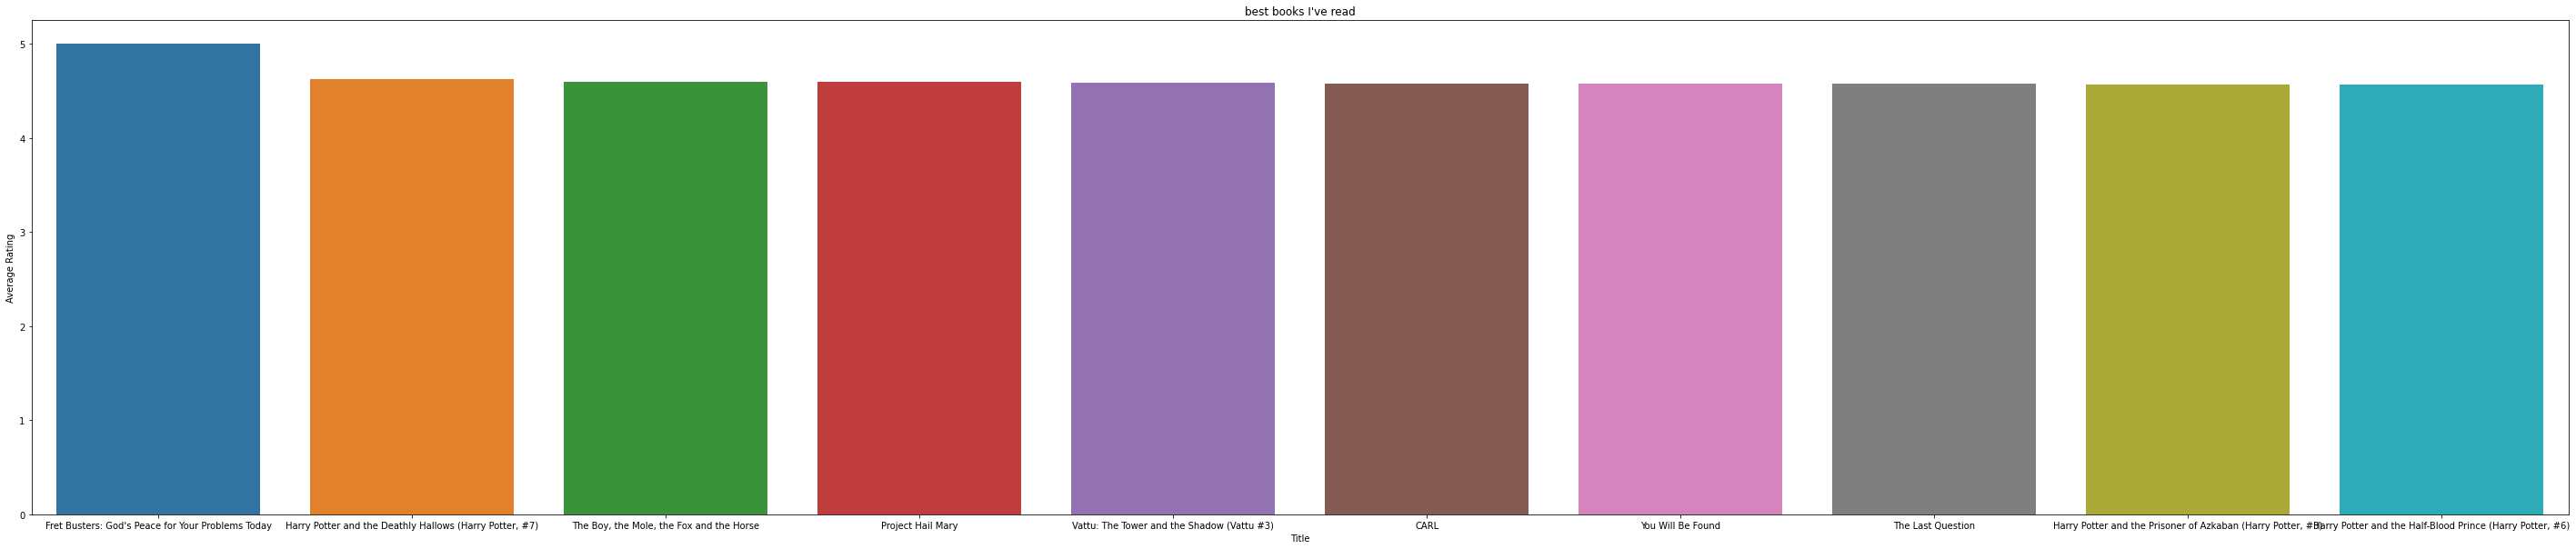

In [37]:
# books = books[books['Read Count'] > 0].sort_values('Average Rating', ascending = False)
sorted_best_to_worst = books[(books['Read Count'] > 0) & (~books['Title'].str.contains('Calvin'))].sort_values('Average Rating', ascending = False)
top_ten_books = sorted_best_to_worst[:10]

plt.figure(figsize = (50, 10))
plt.title('best books I\'ve read')
sns.barplot(x = top_ten_books['Title'],y = top_ten_books['Average Rating'])

Notice that some of the highest rated books on Goodreads are ones that are either insanely popular or insanely unpopular.

# what are the worst books I read?

In [32]:
# sort by rating
# put bottom 10 in a bar chart

# sources

data source: https://github.com/MengtingWan/goodreads